In [96]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# use matplotlib inline as a magic function to allow redering of figures within the notebook

%matplotlib inline

# load in txt file using read_csv, 'r' used before filepath for Windows, sep = " " because
# txt file is space delimited and not comma delimited, which is what read_csv expects
# read_csv automatically creates a DataFrame which is the pandas format we want our data in

df = pd.read_csv(r'C:\Users\Latitude\Documents\Coursera\Wind Resource\Project\Wind_data.txt', 
                 sep=" ", 
                 header=None)

# the txt file doesn't contain the heights at which wind speeds have been gathered
# define these as a list and then define list of ln(height)/ln(reference height)
# np.log for natural logs

height = [40, 60, 80, 100, 120, 140, 150, 160, 180, 200, 225, 250]
lnh = np.log(height)
lnh_ref = np.log(height) - np.log(40)

# for each row of data within the dataframe, want to plot natural log of wind speed
# against lnh_ref defined above, calculate the gradient, which is the wind shear
# exponent, then add the wind shear exponent back into the DataFrame for further 
# analysis. Need to trim the first four columns of data, which represent Year,
# Month, Day and Hour. Trim as per below using df.loc
# data = df.loc[0::, 5::]

# create empty list, alpha
    
alpha = []

# loop over every row in dataframe, calculate slope of lnh_ref against ln(windspeed) and
# use df.loc to limit dataframe to 5th column of data onwards, so Year, Month, Day and Hour
# data isn't included in the calc
# once the gradient (slope) has been calculated, append into the list (alpha)

for i,r in df.iterrows():
    slope, intercept = np.polyfit(lnh_ref, np.log(df.loc[i, 4::]), 1)
    alpha.append(slope)

In [97]:
# add new column, Alpha, to the DataFrame df and load in list alpha as created above

df['Alpha'] = alpha

In [98]:
# check top 5 lines of dataframe using df.head() to see if Alpha is there

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Alpha
0,2014,8,1,0,3.52,4.16,4.58,4.83,5.02,5.24,5.44,5.60,5.68,5.68,5.83,5.81,0.275673
1,2014,8,1,1,3.32,4.08,4.58,4.88,5.14,5.38,5.57,5.73,5.95,6.09,6.48,6.74,0.365437
2,2014,8,1,2,3.03,3.64,4.15,4.48,4.80,5.12,5.35,5.52,5.74,5.97,6.63,6.72,0.431942
3,2014,8,1,3,2.58,3.24,3.78,4.10,4.35,4.58,4.75,4.95,5.29,5.63,5.94,5.86,0.450911
4,2014,8,1,4,3.13,3.82,4.32,4.56,4.69,4.87,5.08,5.16,5.28,5.60,6.19,6.18,0.348400


In [108]:
print('The median wind shear exponent is', round(df['Alpha'].median(), 3))
print('The maximum wind shear exponent is', round(df['Alpha'].min(),3))
print('The minimum wind shear exponent is', round(df['Alpha'].max(),3))

The median wind shear exponent is 0.312
The maximum wind shear exponent is 0.003
The minimum wind shear exponent is 0.839


array([[<AxesSubplot:title={'center':'Alpha'}>]], dtype=object)

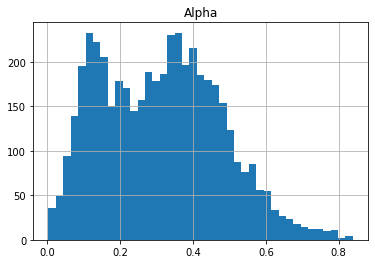

In [41]:
# to plot a histogram of Alpha, use pandas .hist
# bins need to be entered as integer values hence below code. Have defined buckets
# of 0.02

df.hist(column='Alpha', bins=int(df['Alpha'].max()/0.02))

In [109]:
# Objective now is to split the bimodal distribution above into 2x monomodal distributions
# Suspect that the bimodal dist is caused by significant diurnal wind shear difference
# define two new lists, one for day hours, one for night hours

day_hours = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
night_hours = [20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7]

In [58]:
df[df[3].isin(day_hours)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Alpha
8,2014,8,1,8,2.52,2.52,2.59,2.68,2.80,2.79,2.79,2.76,2.77,2.73,2.83,2.76,0.065277
9,2014,8,1,9,1.55,1.64,1.71,1.79,1.89,1.90,1.88,1.89,1.87,1.89,1.91,1.87,0.113990
10,2014,8,1,10,1.65,1.76,1.85,1.98,1.95,2.05,2.06,2.06,2.11,2.14,2.15,2.17,0.153353
11,2014,8,1,11,2.12,2.26,2.28,2.34,2.46,2.48,2.50,2.57,2.70,2.72,2.89,3.00,0.178789
12,2014,8,1,12,2.19,2.24,2.36,2.46,2.53,2.55,2.54,2.55,2.67,2.65,2.85,3.02,0.156628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4734,2015,7,29,10,5.91,6.28,6.47,6.58,6.71,6.77,6.85,6.90,6.95,6.98,7.05,7.11,0.096667
4735,2015,7,29,13,6.34,6.69,7.02,7.17,7.28,7.41,7.54,7.60,7.69,7.73,7.71,7.41,0.104419
4736,2015,7,29,17,5.91,6.25,6.50,6.66,6.83,6.96,7.01,7.11,7.20,7.28,7.39,6.88,0.111214
4737,2015,7,29,19,4.54,5.25,5.70,6.04,6.36,6.66,6.91,7.13,7.32,7.43,7.43,7.57,0.287256


In [111]:
# Create a new DataFrame, named day_db, which resticts the original df dataframe to 
# Just rows where column 3 (hours column) is in the day_hours list created above
# use isin to achieve this. Do the same for night hours in a different dataframe

day_db = df[df[3].isin(day_hours)]
night_db = df[df[3].isin(night_hours)]

array([[<AxesSubplot:title={'center':'Alpha'}>]], dtype=object)

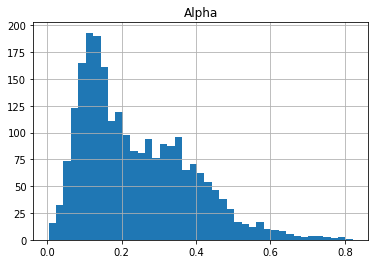

In [112]:
# check to see whether day_db distribution is monomodal by plotting another histogram

day_db.hist(column='Alpha', bins=int(day_db['Alpha'].max()/0.02))

array([[<AxesSubplot:title={'center':'Alpha'}>]], dtype=object)

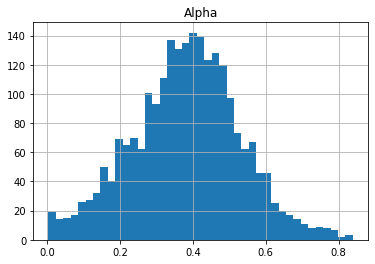

In [113]:
# check to see whether night_db distribution is monomodal by plotting another histogram

night_db.hist(column='Alpha', bins=int(night_db['Alpha'].max()/0.02))

In [114]:
# Data looks much better. Now calculate the median wind shear exponent for day
# and for night. From the historgrams above, and standard meteorlogical knowledge,
# am expecting night wind shear exponent to be greater than day

print('The median daytime wind shear exponent is', round(day_db['Alpha'].median(),3))
print('The median nighttime wind shear exponent is', round(night_db['Alpha'].median(),3))

The median daytime wind shear exponent is 0.203
The median nighttime wind shear exponent is 0.387


In [115]:
# Next step is to calculate the median for each month of data, split
# into day and night.
# Will create a new empty list for these median calculations to go into
# Will also create a numeric month list in order to limit the median calculations
# based on each month

day_db_monthly_median = []
month_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [74]:
# Quick check to see how to limit dataframe to a single month. Example below limits
# the day dataframe to August

day_db.loc[day_db[1] == 8]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Alpha
8,2014,8,1,8,2.52,2.52,2.59,2.68,2.80,2.79,2.79,2.76,2.77,2.73,2.83,2.76,0.065277
9,2014,8,1,9,1.55,1.64,1.71,1.79,1.89,1.90,1.88,1.89,1.87,1.89,1.91,1.87,0.113990
10,2014,8,1,10,1.65,1.76,1.85,1.98,1.95,2.05,2.06,2.06,2.11,2.14,2.15,2.17,0.153353
11,2014,8,1,11,2.12,2.26,2.28,2.34,2.46,2.48,2.50,2.57,2.70,2.72,2.89,3.00,0.178789
12,2014,8,1,12,2.19,2.24,2.36,2.46,2.53,2.55,2.54,2.55,2.67,2.65,2.85,3.02,0.156628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2014,8,31,15,6.64,7.27,7.70,7.86,7.97,8.02,8.19,8.24,8.37,8.31,8.44,8.52,0.126129
427,2014,8,31,16,6.30,7.01,7.37,7.48,7.54,7.58,7.69,7.75,7.85,7.85,7.96,8.20,0.120000
428,2014,8,31,17,6.48,7.31,7.79,8.04,8.24,8.41,8.67,8.90,9.15,9.30,9.51,9.78,0.213214
429,2014,8,31,18,5.22,6.21,6.84,7.33,7.76,8.15,8.57,8.99,9.30,9.52,9.72,9.98,0.358913


In [81]:
# Now calculate median of this refined dataframe - note use of
# adjacent square brackets here to introduce Alpha into the .loc
# code. Couldn't figure out a way of doing this any other way
# The result from below aligns with what I've calculated in Excel, 
# so happy days.

day_db.loc[day_db[1] == 8]['Alpha'].median()

0.15494311338310118

In [116]:
# loop through month list instead of looping through dataframe and input
# the number referring to each month into the month median calculation as per
# above and then append the result of this calculation into the 
# day_db_monthly_median list

for i in month_list:
    month_median = day_db.loc[day_db[1] == i]['Alpha'].median()
    day_db_monthly_median.append(month_median)    

In [117]:
# quickly call the list - looks like it has worked. Nan for May as May data is missing
# from .txt file loaded in

day_db_monthly_median

[0.31914725032767616,
 0.22245993787920387,
 0.155440415506036,
 0.13155157474035684,
 nan,
 0.12315958582480717,
 0.11427324902751163,
 0.15494311338310118,
 0.1441331528170119,
 0.26264627538359625,
 0.33984666052507945,
 0.3189300226420748]

In [85]:
# repeat the same for nightime

night_db_monthly_median = []

for i in month_list:
    month_median = night_db.loc[night_db[1] == i]['Alpha'].median()
    night_db_monthly_median.append(month_median)

In [118]:
# Create a new dataframe with the medians calculated above. Set the index 
# using the month names instead of having numbers from 0 - 11, which 
# could be c

monthly_dataframe = pd.DataFrame({
    'Day Medians': day_db_monthly_median,
    'Night Medians': night_db_monthly_median}, index = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug',
    'Sep','Oct','Nov','Dec'
])

In [86]:
night_db_monthly_median

[0.40025932416811505,
 0.37360134645699017,
 0.35753104494052984,
 0.3532955737698205,
 nan,
 0.3230833892491866,
 0.3348091988980978,
 0.39979571130083197,
 0.41497150290299717,
 0.4675336458990912,
 0.45449946476835146,
 0.38888082532373536]

In [90]:
monthly_dataframe

,Day Medians,Night Medians
Jan,0.319147,0.400259
Feb,0.222460,0.373601
Mar,0.155440,0.357531
Apr,0.131552,0.353296
May,NaN,NaN
Jun,0.123160,0.323083
Jul,0.114273,0.334809
Aug,0.154943,0.399796
Sep,0.144133,0.414972
Oct,0.262646,0.467534


<AxesSubplot:>

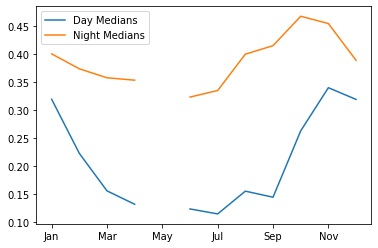

In [120]:
monthly_dataframe.plot()

In [ ]:
# clearly evident from above plot that wind shear exponent is greater an
# night that it is during the day